In [1]:
import xgboost as xg                       #IMPORTED REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
from sklearn.svm import SVR 

In [2]:
model=xg.XGBRegressor                 #FIRST USED XGBREGRESSOR TO FIND THE REGRESSION DATA

In [3]:
all_years=np.loadtxt('S_n_I_A_N_P_An_Io_noaa2.txt')   #CONVERTED THE DATA TO A NUMPY ARRAY

In [4]:
all_years

array([[ 5.99257e-01,  1.67651e-01,  1.02438e+01, ...,  1.08410e+00,
         5.60382e-01, -2.95856e-01],
       [ 6.63879e-01,  2.12788e-01,  4.41611e+01, ..., -1.46579e+00,
         1.18954e+00, -3.29518e-02],
       [-4.28772e-01,  3.36627e-01,  4.76807e+00, ...,  1.14019e-01,
         7.83738e-01, -6.44708e-01],
       ...,
       [ 9.23487e-01,  2.00707e+00, -5.61403e+01, ...,  3.17965e-02,
        -1.88361e-01,  5.34373e-01],
       [ 2.07229e-01,  2.25983e+00, -4.37754e+01, ..., -1.43240e+00,
         8.52037e-03,  7.71095e-01],
       [ 4.08653e-01,  2.48014e+00, -4.04298e+01, ..., -8.68589e-01,
         2.37157e-01,  6.18231e-01]])

In [5]:
all_years[0]

array([ 5.99257e-01,  1.67651e-01,  1.02438e+01,  4.84010e-01,
        8.37464e-04,  1.08410e+00,  5.60382e-01, -2.95856e-01])

As sir said to delete the first column so i deleted the first column.



In [6]:
all_years = np.delete(all_years,0,1)

In [7]:
all_years[0]

array([ 1.67651e-01,  1.02438e+01,  4.84010e-01,  8.37464e-04,
        1.08410e+00,  5.60382e-01, -2.95856e-01])

As the ISMR column is in second column so I swaped the first and second column for my convenience.

In [8]:
all_years[:,[1,0]] = all_years[:,[0,1]] 

In [9]:
all_years[5]

array([-41.5772  ,   0.304163,  -0.131097,   0.426335,  -1.31826 ,
         0.539299,   0.504654])

#  Use ‘Xgboost regresssor’ to predict ISMR for different lag values of the drivers and print the true and predicted values of the ISMR for different lags in a tabular form.Plot the true values vs predicted values of ISMR in scatter plots for different lags separately. Find out which lag is statistically showing best result and elaborate why.

So here i used the regressor for different lags and printed the data in tabularform and the scatter graph respectively for different lags.

FOR LAG =  0


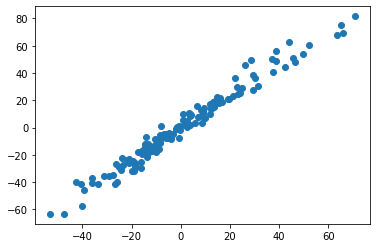

,PREDICTED,ORIGINAL
0,-26.901613,-41.577200
1,-1.526224,0.132196
2,-13.313649,-17.658400
3,13.634512,14.850900
4,-13.734524,-21.739700
...,...,...
140,-27.605467,-34.467200
141,-14.578470,-12.057900
142,44.187653,62.651500
143,-11.979216,-15.239200


In [10]:
lag = 0
Y=[]
X=[]
for j in range(5,len(all_years),6):
    Y.append(all_years[j][0])
    p = all_years[j-lag]
    X.append(p[1:7])
X_train = X[0:120]
Y_train=Y[0:120]
X_test = X[120:145]
Y_test = Y[120:145]
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
xgb_r.fit(X,Y)
pred_1 = xgb_r.predict(X)
    
print("FOR LAG = ",lag)
d={"PREDICTED" : pred_1 ,"ORIGINAL" : Y}
d=pd.DataFrame(d)
plt.scatter(pred_1,Y)
plt.show()
d
    
    

FOR LAG =  1


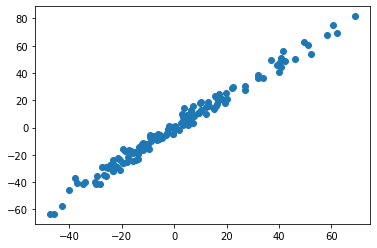

,PREDICTED,ORIGINAL
0,-28.245270,-41.577200
1,-0.729091,0.132196
2,-14.116233,-17.658400
3,12.292830,14.850900
4,-17.728649,-21.739700
...,...,...
140,-26.871105,-34.467200
141,-10.519317,-12.057900
142,49.597885,62.651500
143,-9.860699,-15.239200


In [11]:
lag = 1
Y=[]
X=[]
for j in range(5,len(all_years),6):
    Y.append(all_years[j][0])
    p = all_years[j-lag]
    X.append(p[1:7])
X_train = X[0:120]
Y_train=Y[0:120]
X_test = X[120:145]
Y_test = Y[120:145]
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
xgb_r.fit(X,Y)
pred_2 = xgb_r.predict(X)
    
print("FOR LAG = ",lag)
d={"PREDICTED" : pred_2 ,"ORIGINAL" : Y}
d=pd.DataFrame(d)
plt.scatter(pred_2,Y)
plt.show()
d

FOR LAG =  2


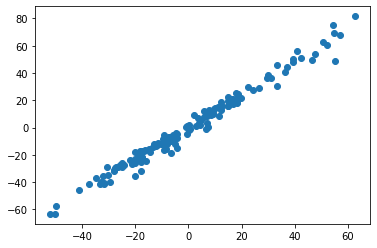

,PREDICTED,ORIGINAL
0,-33.393234,-41.577200
1,-1.076203,0.132196
2,-18.299456,-17.658400
3,11.114928,14.850900
4,-17.321856,-21.739700
...,...,...
140,-30.056793,-34.467200
141,-9.723216,-12.057900
142,50.697956,62.651500
143,-4.369922,-15.239200


In [12]:
lag = 2
Y=[]
X=[]
for j in range(5,len(all_years),6):
    Y.append(all_years[j][0])
    p = all_years[j-lag]
    X.append(p[1:7])
X_train = X[0:120]
Y_train=Y[0:120]
X_test = X[120:145]
Y_test = Y[120:145]
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
xgb_r.fit(X,Y)
pred_3 = xgb_r.predict(X)
    
print("FOR LAG = ",lag)
d={"PREDICTED" : pred_3 ,"ORIGINAL" : Y}
d=pd.DataFrame(d)
plt.scatter(pred_3,Y)
plt.show()
d

FOR LAG =  3


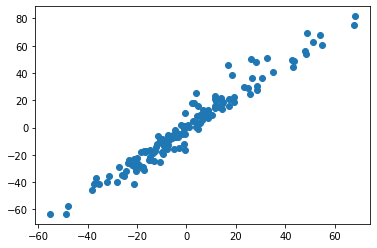

,PREDICTED,ORIGINAL
0,-21.083612,-41.577200
1,3.750895,0.132196
2,-10.045374,-17.658400
3,13.304142,14.850900
4,-14.850447,-21.739700
...,...,...
140,-26.037052,-34.467200
141,-0.976211,-12.057900
142,51.193592,62.651500
143,-2.830986,-15.239200


In [13]:
lag = 3
Y=[]
X=[]
for j in range(5,len(all_years),6):
    Y.append(all_years[j][0])
    p = all_years[j-lag]
    X.append(p[1:7])
X_train = X[0:120]
Y_train=Y[0:120]
X_test = X[120:145]
Y_test = Y[120:145]
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
xgb_r.fit(X,Y)
pred_4 = xgb_r.predict(X)
    
print("FOR LAG = ",lag)
d={"PREDICTED" : pred_4 ,"ORIGINAL" : Y}
d=pd.DataFrame(d)
plt.scatter(pred_4,Y)
plt.show()
d

FOR LAG =  4


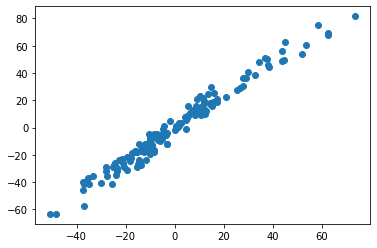

,PREDICTED,ORIGINAL
0,-25.520336,-41.577200
1,0.458628,0.132196
2,-15.727944,-17.658400
3,10.611776,14.850900
4,-19.240786,-21.739700
...,...,...
140,-23.892128,-34.467200
141,-3.292327,-12.057900
142,44.938614,62.651500
143,-10.768845,-15.239200


In [14]:
lag = 4
Y=[]
X=[]
for j in range(5,len(all_years),6):
    Y.append(all_years[j][0])
    p = all_years[j-lag]
    X.append(p[1:7])
X_train = X[0:120]
Y_train=Y[0:120]
X_test = X[120:145]
Y_test = Y[120:145]
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
xgb_r.fit(X,Y)
pred_5 = xgb_r.predict(X)
    
print("FOR LAG = ",lag)
d={"PREDICTED" : pred_5 ,"ORIGINAL" : Y}
d=pd.DataFrame(d)
plt.scatter(pred_5,Y)
plt.show()
d

FOR LAG =  5


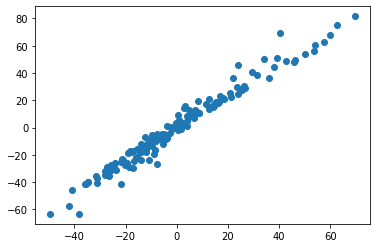

,PREDICTED,ORIGINAL
0,-35.550137,-41.577200
1,-2.430984,0.132196
2,-13.944879,-17.658400
3,14.056604,14.850900
4,-15.955887,-21.739700
...,...,...
140,-28.032677,-34.467200
141,-5.321594,-12.057900
142,57.519142,62.651500
143,-13.023901,-15.239200


In [15]:
lag = 5
Y=[]
X=[]
for j in range(5,len(all_years),6):
    Y.append(all_years[j][0])
    p = all_years[j-lag]
    X.append(p[1:7])
X_train = X[0:120]
Y_train=Y[0:120]
X_test = X[120:145]
Y_test = Y[120:145]
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
xgb_r.fit(X,Y)
pred_6 = xgb_r.predict(X)
    
print("FOR LAG = ",lag)
d={"PREDICTED" : pred_6 ,"ORIGINAL" : Y}
d=pd.DataFrame(d)
plt.scatter(pred_6,Y)
plt.show()
d

Now printed all the scatter graphs at a same place and selected the best scatter graph from the below graphs.

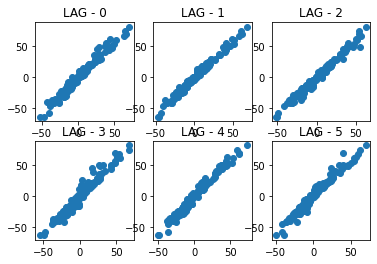

In [16]:
plt.subplot(2,3,1)
plt.scatter(pred_1,Y)
plt.title("LAG - 0")



plt.subplot(2,3,2)
plt.scatter(pred_2,Y)
plt.title("LAG - 1")



plt.subplot(2,3,3)
plt.scatter(pred_3,Y)
plt.title("LAG - 2")


plt.subplot(2,3,4)
plt.scatter(pred_4,Y)
plt.title("LAG - 3")


plt.subplot(2,3,5)
plt.scatter(pred_5,Y)
plt.title("LAG - 4")


plt.subplot(2,3,6)
plt.scatter(pred_6,Y)
plt.title("LAG - 5")
plt.show()


# Predicting the lag showing stastistically the best values:

From above graphs we can say that the Lag - 1 gives the best results because the for lag 1 the values of the points are closer to the 45 degree slope line i.e. diagonal line .

As in scatter plot the best graph will be the one whose points are so close to the central diagonal line.


# Repeat the experiment (2,3) for SVM with different kernel values to find the best performing one. Use grid search method to find the best performance.

Now i solved the same above for different lags and for different kernals seperately.

KERNAL = RBF



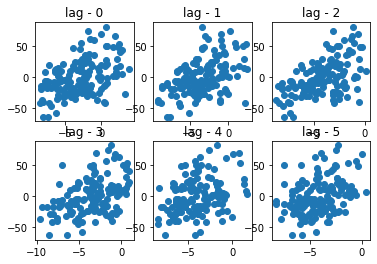

In [17]:
lag = 0
print("KERNAL = RBF")
print()
for i in range(0,6,1):
    lag=i
    Y=[]
    X=[]
    for j in range(5,len(all_years),6):
        Y.append(all_years[j][0])
        p = all_years[j-lag]
        X.append(p[1:7])
    X_train = X[0:120]
    Y_train=Y[0:120]
    X_test = X[120:145]
    Y_test = Y[120:145]
    regressor = SVR(kernel = 'rbf')
    regressor.fit(X,Y)
    pred_1 = regressor.predict(X)
    
    d={"PREDICTED" : pred_1 ,"ORIGINAL" : Y}
    title = "lag - "+str(lag)
    plt.subplot(2,3,lag+1)
    plt.scatter(pred_1,Y)
    plt.title(title)
plt.show()
    

KERNAL = SIGMOID



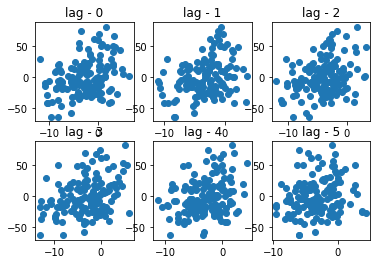

In [18]:
lag = 0
print("KERNAL = SIGMOID")
print()
for i in range(0,6,1):
    lag=i
    Y=[]
    X=[]
    for j in range(5,len(all_years),6):
        Y.append(all_years[j][0])
        p = all_years[j-lag]
        X.append(p[1:7])
    X_train = X[0:120]
    Y_train=Y[0:120]
    X_test = X[120:145]
    Y_test = Y[120:145]
    regressor = SVR(kernel = 'sigmoid')
    regressor.fit(X,Y)
    pred_1 = regressor.predict(X)
    
    d={"PREDICTED" : pred_1 ,"ORIGINAL" : Y}
    title = "lag - "+str(lag)
    plt.subplot(2,3,lag+1)
    plt.scatter(pred_1,Y)
    plt.title(title)
plt.show()
    

KERNAL = POLY DEGREE OF 4



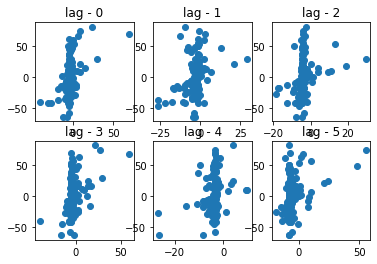

In [19]:
lag = 0
print("KERNAL = POLY DEGREE OF 4")
print()
for i in range(0,6,1):
    lag=i
    Y=[]
    X=[]
    for j in range(5,len(all_years),6):
        Y.append(all_years[j][0])
        p = all_years[j-lag]
        X.append(p[1:7])
    X_train = X[0:120]
    Y_train=Y[0:120]
    X_test = X[120:145]
    Y_test = Y[120:145]
    regressor = SVR(kernel = 'poly',degree = 4)
    regressor.fit(X,Y)
    pred_1 = regressor.predict(X)
    
    d={"PREDICTED" : pred_1 ,"ORIGINAL" : Y}
    title = "lag - "+str(lag)
    plt.subplot(2,3,lag+1)
    plt.scatter(pred_1,Y)
    plt.title(title)
plt.show()
    

KERNAL = LINEAR



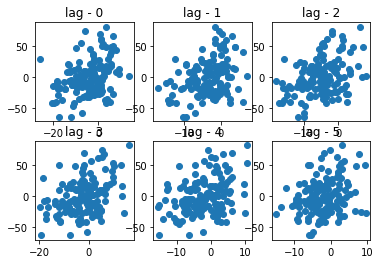

In [20]:
lag = 0
print("KERNAL = LINEAR")
print()
for i in range(0,6,1):
    lag=i
    Y=[]
    X=[]
    for j in range(5,len(all_years),6):
        Y.append(all_years[j][0])
        p = all_years[j-lag]
        X.append(p[1:7])
    X_train = X[0:120]
    Y_train=Y[0:120]
    X_test = X[120:145]
    Y_test = Y[120:145]
    regressor = SVR(kernel = 'linear')
    regressor.fit(X,Y)
    pred_1 = regressor.predict(X)
    
    d={"PREDICTED" : pred_1 ,"ORIGINAL" : Y}
    title = "lag - "+str(lag)
    plt.subplot(2,3,lag+1)
    plt.scatter(pred_1,Y)
    plt.title(title)
plt.show()
    

KERNAL = POLY DEGREE OF 2



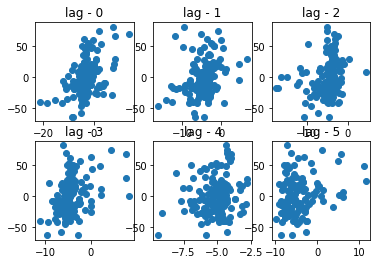

In [21]:
lag = 0
print("KERNAL = POLY DEGREE OF 2")
print()
for i in range(0,6,1):
    lag=i
    Y=[]
    X=[]
    for j in range(5,len(all_years),6):
        Y.append(all_years[j][0])
        p = all_years[j-lag]
        X.append(p[1:7])
    X_train = X[0:120]
    Y_train=Y[0:120]
    X_test = X[120:145]
    Y_test = Y[120:145]
    regressor = SVR(kernel = 'poly',degree=2)
    regressor.fit(X,Y)
    pred_1 = regressor.predict(X)
    
    d={"PREDICTED" : pred_1 ,"ORIGINAL" : Y}
    title = "lag - "+str(lag)
    plt.subplot(2,3,lag+1)
    plt.scatter(pred_1,Y)
    plt.title(title)
plt.show()
    

KERNAL = POLY DEGREE OF 3



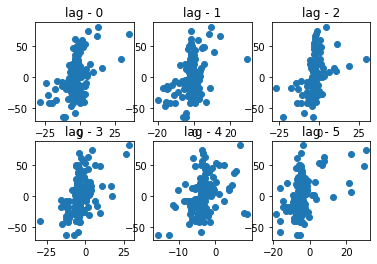

In [22]:
lag = 0
print("KERNAL = POLY DEGREE OF 3")
print()
for i in range(0,6,1):
    lag=i
    Y=[]
    X=[]
    for j in range(5,len(all_years),6):
        Y.append(all_years[j][0])
        p = all_years[j-lag]
        X.append(p[1:7])
    X_train = X[0:120]
    Y_train=Y[0:120]
    X_test = X[120:145]
    Y_test = Y[120:145]
    regressor = SVR(kernel = 'poly',degree=3)
    regressor.fit(X,Y)
    pred_1 = regressor.predict(X)
    
    d={"PREDICTED" : pred_1 ,"ORIGINAL" : Y}
    title = "lag - "+str(lag)
    plt.subplot(2,3,lag+1)
    plt.scatter(pred_1,Y)
    plt.title(title)
plt.show()

So from the above all graphs we are getting smother curves for polynomials of higher degrees it means the dispersion of data is less for higher degree polynomials.


As polynomials of higher degrees will give the better data as it can cover all the types of lower order polynomials.
